# Overview

## Keywords
*feature, feature extraction, feature description, image patch*

## Feature extraction (特徵提取)

Computer does not have cognitive ability to cope with photos and images like human does, they only know number (i.e.binary number). Thus, we need to somehow convert images into other form of data structure that computers can understand. Such a process is commonly known as *feature extraction* and these representation of data structure is called *feature*. We can train a computer to recgonise the pattern through these features.


電腦不認識圖像，只知道數值，為了使電腦能夠像人類的視覺一樣，透過觀察理解圖像，我們研究如何從圖像的像素值，抽取有用的數據或訊息，來描述這個圖像或物體，這個過程就是特徵提取，這些描述就是所謂的特徵，我們可以透過這些特徵，通過訓練來讓電腦如何懂得這些特徵。

## Feature (特徵)

Feature is a concept that given any image, there exist a patch where the texture is numerically, or mathematically distinct from rest of the areas. Some of these can be found directly in its change of pixel value such as intensity, edge, color and so forth, while in reality many of them requires a more complicated process such as moment analysis, Hough transfrom, Principle Component Analysis (PCA) and so forth. After features are obtained, they can be used in many classification applications such as object recognition, matching, visual tracking and so forth.

特徵是某個物體或圖像，能夠和其他物體或圖像區分的特點或特性，或是這些特點或特性的集合，有一些是透過像素值，很直接就能得到的，比如說強度、邊緣、顏色等，有些是要透過變換或計算才能得到的，比如說矩(moment)、直方圖、主成分等，這概念用於物體識別、影像匹配、視覺跟蹤等。

## Feature vector (特徵向量)

The feature of a given image patch can be expressed by a fixed number of characteristics. If only one characteristic is expressed, it is a 1-dimensional vector (i.e. a number). For two or more characteristics, it is a 2 or n-dimensional column vector

我們常將一類對象的單個或多種特性結合起來，形成一個特徵向量來表示這個對象，如果只有一個特徵，則特徵向量為一維向量，如果是n個特性的組合，則為n維向量

## Feature description (描述子)

There are several of common approaches to describe them.

- Diameter：number of pixel around the edge
- Area：number of pixel within the region
- Center of mass
- Average intensity：Average pixel intensity within the region
- Smallest rectangle
- Biggest intensity
- Smallest intensity
- Larger or smaller than a number

以下為一些常用來描述的特徵，通常會將這些組合成特徵向量以供分類使用：

- 周長：區域邊界上的像素數目
- 面積：區域的像素總數
- 質心位置
- 平均強度：區域所有像素的平均值
- 包含區域的最小矩形
- 最大強度
- 最小強度
- 大於或小於平均強度的個數

For simplicity sake, think of feature descriptor as **a point exists in a $n$-dimension world**. Any image patch that apply will be mapped to a corresponding point in this world. With that in mind we can induce that **any two image patches has a similar pattern, their distance will be smaller and vise versa**. Essentially, classcification is just a process to find a separation line (or plane or 3 or higher dimensional space) on the given n-dimensional space.

我們可把特徵向量想成是空間中的一個點，n個特徵就是在n維空間的一個點，而分類的行為就是對這個空間的一種劃分。

# SIFT (SIFT特徵)

* `SiftFeatureDetector` 找到影像的SURF特徵
* `drawKeyPoints()` 劃出特徵點，旗標使用 `DRAW_RICH_KEYPOINTS`，可看出圓圈的尺寸與特徵的尺度成正比
* 由於SURF算法將方向與每個特徵作關聯，使得特徵具有旋轉無關性
* `SiftDescriptorExtractor` 得到特徵點的SIFT描述子
* 描述子是一個Mat，行數與特徵點個數相同，每行都是一個N維的特徵向量
* SIFT的描述子維度為128
* 特徵向量描述特徵點周圍的強度樣式，兩個特徵點越類似，特徵向量的距離越近
* 比起SURF，SIFT雖然較慢但搜尋的特徵較準確

假使我們想匹配在不同圖像的兩個相同物體，首先取得每個圖像的特徵，然後提取他們的描述子，將第一幅圖像和第二幅圖像中的每個特徵向量做比較，距離最近的特徵向量即為那個特徵的最佳匹配，對第一幅圖像的所有特徵都進行此處理，這也是 `BruteForceMatcher` 所採用的方法。

In [1]:
# import library
import cv2
import numpy as np
import matplotlib.pyplot as plt
# create and perform SIFT
cv_image = cv2.imread('butterfly.jpg')
cv_imgGray = cv2.cvtColor(cv_image, cv2.COLOR_RGB2GRAY)
sift = cv2.xfeatures2d_SIFT.create()
kp, des = sift.detectAndCompute(cv_imgGray,None)
# data conversion for display purpose
pts = np.array([p.pt for p in kp]).astype(int)
des = np.array(des).astype(int)
np.set_printoptions(threshold=np.nan)

In [2]:
pos = np.random.randint(len(pts));
print("\033[1m Descriptor " + '#'+str(pos+1)+"\033[0m")
print("position:", pts[pos])
print("descriptor(" + str(len(des[pos])) + "-dimensional vector):") 
print(des[pos])

 Descriptor #173
position: [112 190]
descriptor(128-dimensional vector):
[ 93  30  20  24  16  31  25  32  14   1   7  49 114  95  30   7 114  24
   0   0  15  14  23  37  45  14   4   5  47  79  22  10  41  72 114  51
   4   1   5   9 100  17  50  71  30  12  49  52  94  69   5   7  49  44
  64  35  47 114   6   4  57  38   0   0  41  28  22   8   6   6  36  67
  93  97  32  32  19  14  36  25  19  92  52  83 114  13   3   3   9 114
  56  30  34   2   0   0  20  60  40  12   2   1   1   5   2  34  66  58
   9   2   1   1   0  31  67  51  11   0   0   0   0  26  28  21   6   0
   1   0]


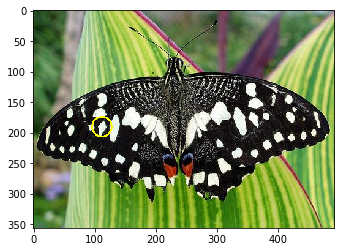

In [3]:
x, y = kp[pos].pt
cv_image = cv2.imread('butterfly.jpg')
cv_image = cv2.circle(cv_image, (int(x), int(y)), int(kp[pos].size * 2), \
                      (0, 255, 255), 2)
plt.imshow(cv2.cvtColor(cv_image, cv2.COLOR_RGB2BGR))
plt.show()

# SURF (SURF特徵)

* `SurfFeatureDetector` 找到影像的SURF特徵
* 接著用 `drawKeyPoints()`劃出特徵點，旗標使用 `DRAW_RICH_KEYPOINTS`，可看出圓圈的尺寸與特徵的尺度成正比
* 由於SURF算法將方向與每個特徵作關聯，使得特徵具有旋轉無關性
* `SurfDescriptorExtractor` 得到特徵點的SURF描述子
* 描述子是一個Mat，行數與特徵點個數相同，每行都是一個N維的特徵向量
* SURF的默認維度為64
* 特徵向量描述特徵點周圍的強度樣式，兩個特徵點越類似，特徵向量的距離越近

假使我們想匹配在不同圖像的兩個相同物體，首先取得每個圖像的特徵，然後提取他們的描述子，將第一幅圖像和第二幅圖像中的每個特徵向量做比較，距離最近的特徵向量即為那個特徵的最佳匹配，對第一幅圖像的所有特徵都進行此處理，這也是 `BruteForceMatcher` 所採用的方法。